<a href="https://colab.research.google.com/github/SejinHan25/crack_segmentation/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Mount Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Load

In [ ]:
!unzip -qq "/content/drive/MyDrive/Colab Notebooks/crack_segmentation/testdata.zip"

replace images/20160222_080933.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [ ]:
!unzip -qq "/content/drive/MyDrive/Colab Notebooks/crack_segmentation/traincrop.zip"

replace traincrop/20160316_142223_361_1281.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


## 이미지 불러오기

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import glob
import seaborn as sns

from ipywidgets import interact
from PIL import Image
from glob import glob

In [ ]:
# 원본 데이터
o_image_path = "/content/images/"
o_mask_path = "/content/masks/"

images_paths = glob(o_image_path+"*.jpg") + glob(o_image_path+"*.JPG") 
masks_paths = glob(o_mask_path + "*.png")

images_paths.sort([str(p) for p in images_paths])
masks_paths.sort([str(p) for p in masks_paths])

# print(len(images_paths))
# print(len(masks_paths))

# print(images_paths)
# print(masks_paths)

df_origin = pd.DataFrame({'images': images_paths, 'masks': masks_paths})
df_origin.head(5)

,images,masks
0,/content/images/20160222_080933.jpg,/content/masks/20160222_080933_mask.png
1,/content/images/20160222_081839.jpg,/content/masks/20160222_081839_mask.png
2,/content/images/20160222_114759.jpg,/content/masks/20160222_114759_mask.png
3,/content/images/20160222_115305.jpg,/content/masks/20160222_115305_mask.png
4,/content/images/20160222_163940.jpg,/content/masks/20160222_163940_mask.png


In [ ]:
# cropped 데이터
c_path = "/content/traincrop/"
masks_paths = glob(c_path + "*.png")

df_crop = pd.DataFrame({'masks': masks_paths})
df_crop.head(5)

,masks
0,/content/traincrop/20160328_154325_1281_721.png
1,/content/traincrop/20160328_154318_641_361.png
2,/content/traincrop/20160330_170256_641_361.png
3,/content/traincrop/20160328_153714_1921_1081.png
4,/content/traincrop/20160326_150337_1281_1.png


In [ ]:
# 이미지 회전
for i in range(len(df_origin)):
    img_path = df_origin.iloc[i].images
    mask_path = df_origin.iloc[i].masks

    image = cv2.imread(img_path)
    mask = cv2.imread(mask_path)

    if image.shape[0] > image.shape[1]:
        os.remove(img_path)
        image = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)
        cv2.imwrite(img_path, image)


    if mask.shape[0] > mask.shape[1]:
        os.remove(mask_path)
        mask = cv2.rotate(mask, cv2.ROTATE_90_CLOCKWISE)
        cv2.imwrite(mask_path, mask)

In [ ]:
@interact(index=(0, len(df_origin)-1))
def show_images(index=0):
    image = cv2.imread(df_origin.iloc[index].images)
    mask = cv2.imread(df_origin.iloc[index].masks)

    plt.figure(figsize=(12,10))
    plt.subplot(121)
    plt.title("image")
    plt.imshow(image)
    plt.subplot(122)
    plt.title("mask")
    plt.imshow(mask)
    plt.tight_layout()

interactive(children=(IntSlider(value=0, description='index', max=199), Output()), _dom_classes=('widget-inter…

## Alpha Blending

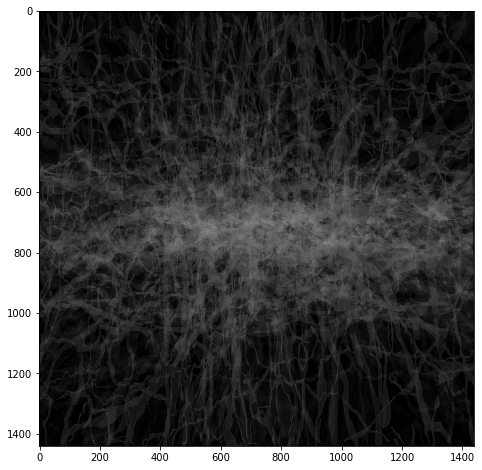

In [ ]:
# 원본 이미지

dst = cv2.imread(df_origin.iloc[0].masks)
dst = cv2.resize(dst,(1440, 1440))

for i in range(0, len(df_origin)):
    if i == 0:
        pass
    else:
        img = cv2.imread(df_origin.iloc[i].masks)
        img = cv2.resize(img, (1440,1440))
        alpha = 1.0/(i+1)
        beta = 1.0 - alpha
        dst = cv2.addWeighted(img, alpha, dst, beta, 0)
        kernel = np.array([[-1,-1,-1], [-1,10,-1], [-1,-1,-1]])
        im = cv2.filter2D(dst, -1, kernel)
        
plt.figure(figsize=(8,8))
plt.imshow(im)

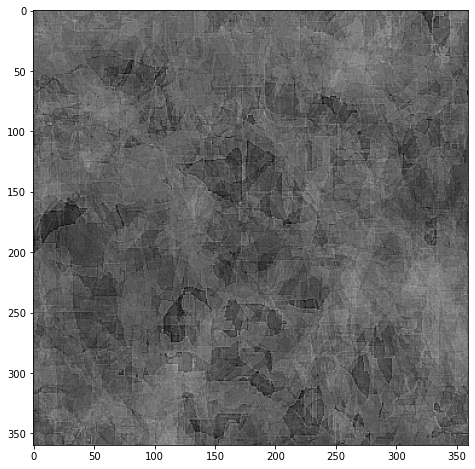

In [ ]:
# cropped 이미지

dst = cv2.imread(df_crop.iloc[0].masks)
dst = cv2.resize(dst,(360, 360))

for i in range(0, len(df_crop)):
    if i == 0:
        pass
    else:
        img = cv2.imread(df_crop.iloc[i].masks)
        img = cv2.resize(img, (360,360))
        alpha = 1.0/(i+1)
        beta = 1.0 - alpha
        dst = cv2.addWeighted(img, alpha, dst, beta, 0)
        kernel = np.array([[-1,-1,-1], [-1,10,-1], [-1,-1,-1]])
        im = cv2.filter2D(dst, -1, kernel)
plt.figure(figsize=(8,8))
plt.imshow(im)